In [34]:
from pylab import rcParams
rcParams['figure.figsize'] = 12,8

import pandas as pd
import matplotlib.pyplot as plt

In [41]:
original = pd.read_csv(
    f'datasets_1358_30676_Players.csv')
original.set_index(['Index'], inplace = True)
original = original[original['born'].notna()]
original['born'] = original['born'].astype('int')
original

,Player,height,weight,collage,born,birth_city,birth_state
Index,,,,,,,
0,Curly Armstrong,180.0,77.0,Indiana University,1918,NaN,NaN
1,Cliff Barker,188.0,83.0,University of Kentucky,1921,Yorktown,Indiana
2,Leo Barnhorst,193.0,86.0,University of Notre Dame,1924,NaN,NaN
3,Ed Bartels,196.0,88.0,North Carolina State University,1925,NaN,NaN
4,Ralph Beard,178.0,79.0,University of Kentucky,1927,Hardinsburg,Kentucky
...,...,...,...,...,...,...,...
3917,Troy Williams,198.0,97.0,South Carolina State University,1969,Columbia,South Carolina
3918,Kyle Wiltjer,208.0,108.0,Gonzaga University,1992,Portland,Oregon
3919,Stephen Zimmerman,213.0,108.0,"University of Nevada, Las Vegas",1996,Hendersonville,Tennessee


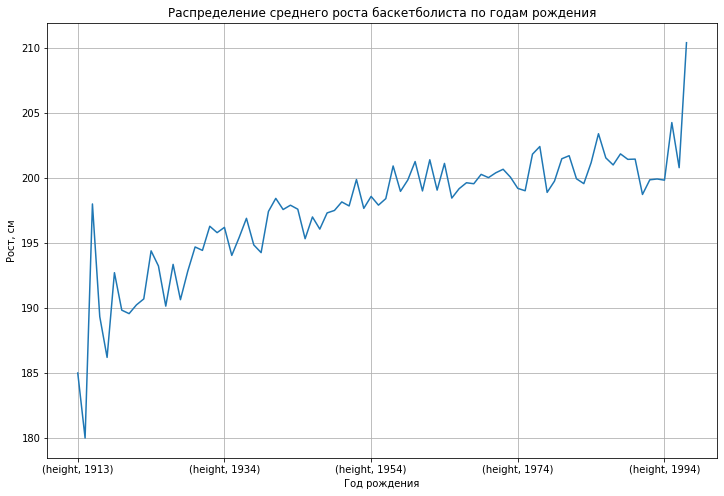

In [45]:
average_height = original.groupby('born').mean()
height = average_height[['height']]
height.unstack().plot()
plt.xlabel('Год рождения')
plt.ylabel('Рост, см')
plt.title('Распределение среднего роста баскетболиста по годам рождения')
plt.grid()

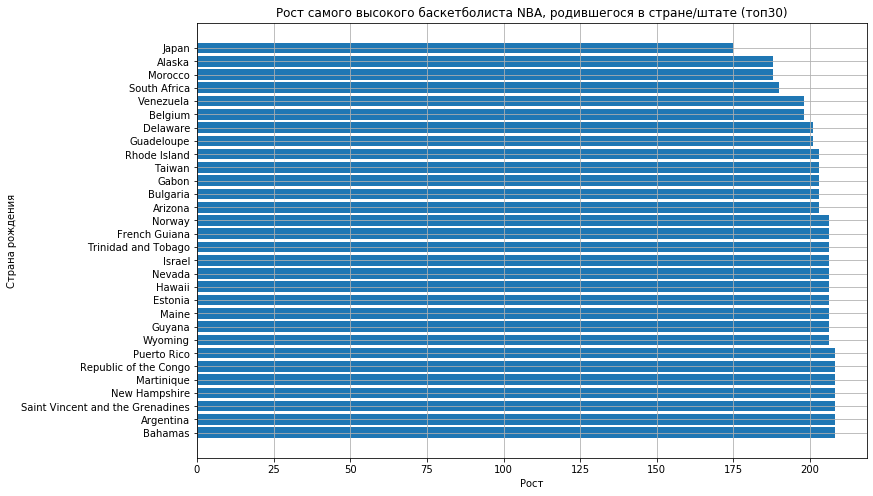

In [112]:
amount = original.groupby('birth_state')[['height']].max()
corrected = amount.sort_values('height', ascending = False).tail(30)
corrected['height'] = corrected['height'].astype('int')
corrected
plt.barh(corrected.index, corrected['height'])
plt.xlabel('Рост')
plt.ylabel('Страна рождения')
plt.title('Рост самого высокого баскетболиста NBA, родившегося в стране/штате (топ30)')
plt.grid()

In [184]:
pollution = pd.read_csv(
    'Measurement_summary.csv', na_values = -1)
#pollution = pollution.drop('', axis=1)
pollution_at_station = pollution.groupby('Station code').mean()
pollution_at_station

,Latitude,Longitude,SO2,NO2,O3,CO,PM10,PM2.5
Station code,,,,,,,,
101,37.572016,127.005007,0.004386,0.031631,0.024625,0.585477,38.010783,22.889185
102,37.564263,126.974676,0.003591,0.032300,0.025524,0.504854,37.988530,22.876385
103,37.540033,127.004850,0.003509,0.029887,0.021742,0.446590,35.827789,23.864330
104,37.609823,126.934848,0.004254,0.024848,0.028534,0.553679,42.754251,25.154242
105,37.593742,126.949679,0.004272,0.023963,0.025628,0.601378,42.494438,23.410106
106,37.555580,126.905598,0.003945,0.027241,0.024739,0.529104,47.856737,30.533499
107,37.541864,127.049659,0.004412,0.028818,0.021646,0.485051,49.918974,25.529944
108,37.547180,127.092493,0.004315,0.027827,0.023455,0.628947,45.842132,29.334506
109,37.575743,127.028885,0.005420,0.030053,0.022861,0.520897,39.082312,23.181757


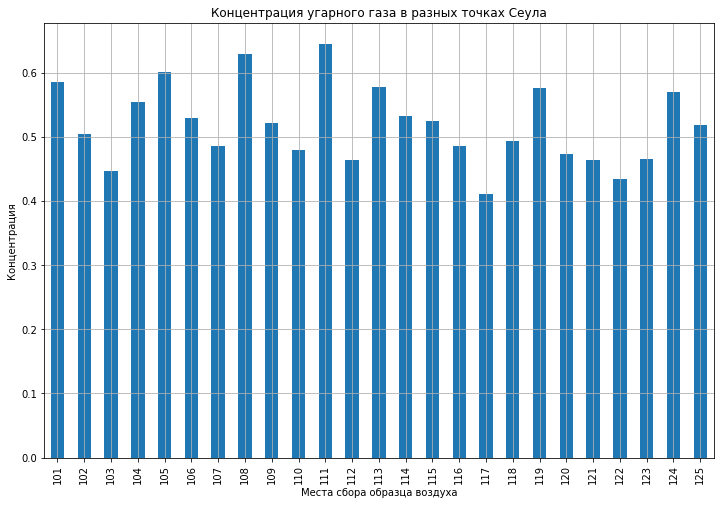

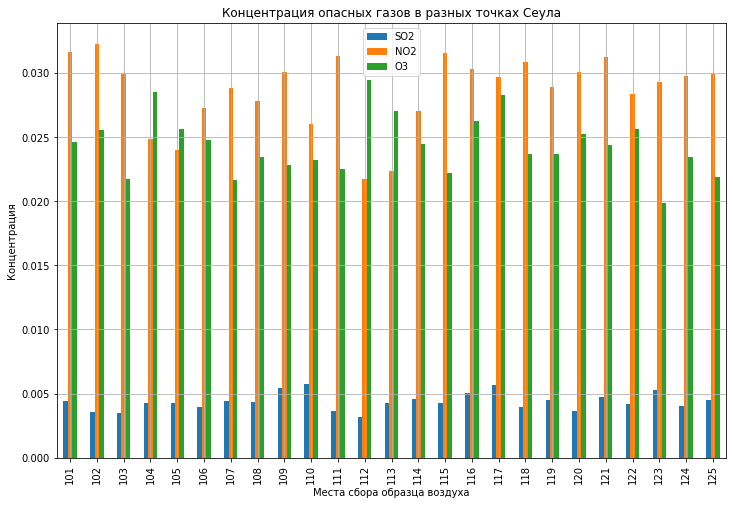

In [185]:
pollution_at_station = pollution_at_station.drop(['Latitude', 'Longitude', 'PM10', 'PM2.5'], axis=1)
pollution_at_station['CO'].plot(kind='bar')
plt.xlabel('Места сбора образца воздуха')
plt.ylabel('Концентрация')
plt.title('Концентрация угарного газа в разных точках Сеула')
plt.grid()
plt.show
pollution_at_station = pollution_at_station.drop(['CO'], axis=1)
pollution_at_station.plot(kind='bar')
plt.xlabel('Места сбора образца воздуха')
plt.ylabel('Концентрация')
plt.title('Концентрация опасных газов в разных точках Сеула')
plt.grid()


In [186]:
import seaborn as sns